In [ ]:
import pandas as pd
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('classification_preprocessed.csv', index_col=0)

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          395 non-null    int64
 1   Medu         395 non-null    int64
 2   Fedu         395 non-null    int64
 3   guardian_    395 non-null    int64
 4   traveltime   395 non-null    int64
 5   studytime    395 non-null    int64
 6   failures     395 non-null    int64
 7   famrel       395 non-null    int64
 8   freetime     395 non-null    int64
 9   goout        395 non-null    int64
 10  Dalc         395 non-null    int64
 11  Walc         395 non-null    int64
 12  health       395 non-null    int64
 13  absences     395 non-null    int64
 14  G1           395 non-null    int64
 15  G2           395 non-null    int64
 16  G3           395 non-null    int64
 17  school_      395 non-null    int64
 18  sex_         395 non-null    int64
 19  address_     395 non-null    int64
 20  famsize_  

In [ ]:
df.head(4)

,age,Medu,Fedu,guardian_,traveltime,studytime,failures,famrel,freetime,goout,...,Fjob_,reason_,schoolsup_,famsup_,paid_,activities_,nursery_,higher_,internet_,romantic_
0,18,4,4,1,2,2,0,4,3,4,...,4,0,1,0,0,0,1,1,0,0
1,17,1,1,0,1,2,0,5,3,3,...,2,0,0,1,0,0,0,1,1,0
2,15,1,1,1,1,2,3,4,3,2,...,2,2,1,0,1,0,1,1,1,0
3,15,4,2,1,1,3,0,3,2,2,...,3,1,0,1,1,1,1,1,1,1


In [ ]:
X = df.drop(['Dalc'], 1)
y = df['Dalc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Обучим модель с помощью метода KNN

In [ ]:
from sklearn.metrics import auc, roc_curve, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
parametrs = {'n_neighbors':range(1, 10)}
knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parametrs)
clf.fit(X_train, y_train)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'n_neighbors': 6}

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  3  1  0  0]
 [22  3  0  0  0]
 [ 7  0  0  0  0]
 [ 1  0  0  0  0]
 [ 3  2  0  0  0]]
              precision    recall  f1-score   support

           1       0.70      0.95      0.81        81
           2       0.38      0.12      0.18        25
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5

    accuracy                           0.67       119
   macro avg       0.21      0.21      0.20       119
weighted avg       0.56      0.67      0.59       119



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 1. Одномерный отбор признаков

In [ ]:
array = df.values
X = array[:,0:5]
Y = array[:,5]

# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features
print(features[0:3,:])

[0.474 0.97  2.906 2.387 2.329]
[[4 1 2]
 [1 0 1]
 [1 1 1]]


In [ ]:
df.head()

,age,Medu,Fedu,guardian_,traveltime,studytime,failures,famrel,freetime,goout,...,Fjob_,reason_,schoolsup_,famsup_,paid_,activities_,nursery_,higher_,internet_,romantic_
0,18,4,4,1,2,2,0,4,3,4,...,4,0,1,0,0,0,1,1,0,0
1,17,1,1,0,1,2,0,5,3,3,...,2,0,0,1,0,0,0,1,1,0
2,15,1,1,1,1,2,3,4,3,2,...,2,2,1,0,1,0,1,1,1,0
3,15,4,2,1,1,3,0,3,2,2,...,3,1,0,1,1,1,1,1,1,1
4,16,3,3,0,1,2,0,4,3,2,...,2,1,0,1,1,0,1,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[60  9  8  0  0]
 [22  4  0  0  0]
 [ 5  1  1  0  0]
 [ 6  0  0  0  0]
 [ 2  1  0  0  0]]
              precision    recall  f1-score   support

           1       0.63      0.78      0.70        77
           2       0.27      0.15      0.20        26
           3       0.11      0.14      0.12         7
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         3

    accuracy                           0.55       119
   macro avg       0.20      0.22      0.20       119
weighted avg       0.47      0.55      0.50       119



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(df.shape)

(395, 33)


# 2. Рекурсивное исключение признаков

In [ ]:
estimator = SVR(kernel="linear")
rfe = RFE(estimator, n_features_to_select=3, step=1)
rfe = rfe.fit(X, Y)
print("Количество функций:", rfe.n_features_)
print("Выбранные функции:", rfe.support_)
print("Рейтинг характеристик:", rfe.ranking_)

Количество функций: 3
Выбранные функции: [False  True False  True  True]
Рейтинг характеристик: [2 1 3 1 1]


In [ ]:
df.head()

,age,Medu,Fedu,guardian_,traveltime,studytime,failures,famrel,freetime,goout,...,Fjob_,reason_,schoolsup_,famsup_,paid_,activities_,nursery_,higher_,internet_,romantic_
0,18,4,4,1,2,2,0,4,3,4,...,4,0,1,0,0,0,1,1,0,0
1,17,1,1,0,1,2,0,5,3,3,...,2,0,0,1,0,0,0,1,1,0
2,15,1,1,1,1,2,3,4,3,2,...,2,2,1,0,1,0,1,1,1,0
3,15,4,2,1,1,3,0,3,2,2,...,3,1,0,1,1,1,1,1,1,1
4,16,3,3,0,1,2,0,4,3,2,...,2,1,0,1,1,0,1,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54 18  4  0  1]
 [16  7  5  0  1]
 [ 3  4  0  0  0]
 [ 2  1  0  0  0]
 [ 2  0  0  1  0]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        77
           2       0.23      0.24      0.24        29
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3

    accuracy                           0.51       119
   macro avg       0.19      0.19      0.19       119
weighted avg       0.51      0.51      0.51       119



In [ ]:
print(df.shape)

(395, 33)


# 3. Отбор на основе важности признаков

In [ ]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.277 0.274 0.204 0.109 0.137]


In [ ]:
df.head()

,age,Medu,Fedu,guardian_,traveltime,studytime,failures,famrel,freetime,goout,...,Fjob_,reason_,schoolsup_,famsup_,paid_,activities_,nursery_,higher_,internet_,romantic_
0,18,4,4,1,2,2,0,4,3,4,...,4,0,1,0,0,0,1,1,0,0
1,17,1,1,0,1,2,0,5,3,3,...,2,0,0,1,0,0,0,1,1,0
2,15,1,1,1,1,2,3,4,3,2,...,2,2,1,0,1,0,1,1,1,0
3,15,4,2,1,1,3,0,3,2,2,...,3,1,0,1,1,1,1,1,1,1
4,16,3,3,0,1,2,0,4,3,2,...,2,1,0,1,1,0,1,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52 18  6  3  2]
 [18  3  3  0  0]
 [ 6  1  1  1  0]
 [ 3  0  0  0  0]
 [ 1  1  0  0  0]]
              precision    recall  f1-score   support

           1       0.65      0.64      0.65        81
           2       0.13      0.12      0.13        24
           3       0.10      0.11      0.11         9
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2

    accuracy                           0.47       119
   macro avg       0.18      0.18      0.18       119
weighted avg       0.48      0.47      0.47       119



In [ ]:
print(df.shape)

(395, 33)


# 4. PCA

In [ ]:
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
features = fit.transform(X)

# summarize components
print("Explained Variance:", fit.explained_variance_ratio_)
print(features[0:5,:])

Explained Variance: [0.454 0.301 0.099]
[[-0.833  2.12   0.71 ]
 [ 1.967 -1.079 -0.352]
 [ 0.978 -2.628 -0.533]
 [-1.378 -1.083 -1.055]
 [-0.924 -0.376 -0.091]]


In [ ]:
df = pd.DataFrame(features, columns=['feature 1', 'feature 2', 'feature 3'])

In [ ]:
df.shape

(395, 3)

In [ ]:
df.head()

,feature 1,feature 2,feature 3
0,-0.833308,2.119898,0.709553
1,1.967108,-1.078562,-0.351998
2,0.978283,-2.628105,-0.533274
3,-1.378457,-1.082710,-1.054712
4,-0.923865,-0.376377,-0.091248


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64  9  1  4  1]
 [20  4  0  0  0]
 [ 7  2  0  1  0]
 [ 3  0  0  0  0]
 [ 3  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.66      0.81      0.73        79
           2       0.27      0.17      0.21        24
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3

    accuracy                           0.57       119
   macro avg       0.19      0.20      0.19       119
weighted avg       0.49      0.57      0.52       119



# Task 2

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
model = KMeans(n_clusters = 3)

In [ ]:
model.fit(df)

KMeans(n_clusters=3)

In [ ]:
all_predictions = model.predict(df)

In [ ]:
print(all_predictions)

[1 2 2 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2 2 1
 1 1 2 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2 2 1 1 1 1 2 2 2 2 1 2 2
 1 1 2 2 2 1 2 2 2 2 2 1 2 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1
 1 2 1 2 1 1 1 2 1 2 2 1 1 2 1 1 0 0 1 1 2 2 1 1 1 1 1 2 1 1 2 1 2 2 2 2 2
 1 2 0 2 1 0 1 2 2 0 2 1 2 2 2 2 2 2 2 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 2
 1 2 2 1 2 2 2 2 1 2 1 1 1 1 1 1 2 2 2 2 1 2 1 2 1 0 1 2 0 1 2 1 0 2 2 2 2
 2 0 1 0 2 2 0 2 1 2 1 1 2 2 2 2 2 0 1 1 1 1 0 2 2 0 0 2 0 1 0 2 2 2 1 0 0
 2 1 1 0 1 0 1 2 1 0 0 0 0 0 2 1 2 0 1 1 1 2 2 0 0 2 2 0 2 0 1 0 1 0 2 0 1
 0 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 1 1 2 1 1 0 1 0
 0 0 1 0 2 0 2 0 1 1 2 0 0 1 1 1 0 0 1 0 0 1 0 1 2 0 0 0 0 0 1 2 0 1 2 0 1
 0 0 2 2 1 0 0 1 0 2 1 0 2 0 0 0 1 0 0 0 0 2 0 0 0]


# Иерахаическая кластеризация

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [ ]:
samples = df.values

In [ ]:
mergings = linkage(samples, method='complete')

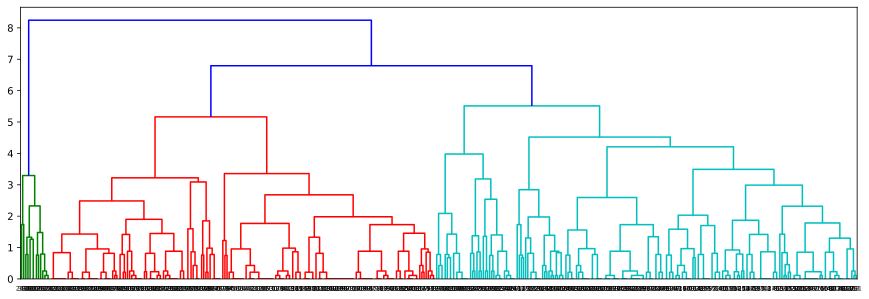

In [ ]:
dendrogram(mergings,
           #labels=varieties,
           leaf_rotation=0,
           leaf_font_size=6,
           )

plt.show()

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
model = TSNE(learning_rate=100)

In [ ]:
transformed = model.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

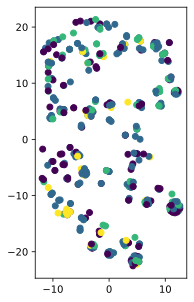

In [ ]:
plt.subplot(aspect='equal')
plt.scatter(x_axis, y_axis, c=Y)
plt.show()

# Метод кластеризации на основе плотности DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN()

In [ ]:
dbscan.fit(df)

DBSCAN()

In [ ]:
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)

In [ ]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend (('Кластер 1', 'Кластер 2', 'Шум'))
plt.show()

NameError: ignored

# Оценка качества кластеризации

In [ ]:
from sklearn.metrics import rand_score, fowlkes_mallows_score, pairwise_distances, davies_bouldin_score
from sklearn import metrics

Внешние

Индекс Rand оценивает, насколько много из тех пар элементов, которые находились в одном классе, и тех пар элементов, которые находились в разных классах, сохранили это состояние после кластеризации алгоритмом.

Имеет область определения от 0 до 1, где 1 — полное совпадение кластеров с заданными классами, а 0 — отсутствие совпадений.

In [ ]:
model = KMeans(n_clusters=2)
model.fit(df)

labels_true = Y
labels_pred = model.predict(df)


rand_score(labels_true, labels_pred)

0.5021139883055966

In [ ]:
fowlkes_mallows_score(labels_true, labels_pred)

0.4212897608790747

Внутренние

Индекс Калински-Харабаса - это соотношение между межгрупповой дисперсией и внутригрупповой дисперсией. Должен возрастать.

In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(X, labels)

190.83196819075047

Индекс Дэвиса-Болдина

Ноль — это наименьший возможный результат. Значения, близкие к нулю, указывают на лучшее разделение.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X, labels)

1.3474413242631713